In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from fastai.vision import *
from fastai.metrics import accuracy
from fastai.basic_data import *
from skimage.util import montage
import pandas as pd
from torch import optim
import re
import json
from PIL import Image
from fastai.callbacks.hooks import num_features_model
from torch.nn import L1Loss

In [3]:
import numpy as np
import torch
import pandas as pd
import random
import string

In [5]:
import torchvision.models as models
model = models.resnet18(pretrained = True)

In [7]:
np.random.seed(42)

In [8]:
image_size = 224

In [9]:
data_dir = '../../data/train/'

In [10]:
src = (ImageList.from_folder(path=data_dir).split_by_rand_pct(0.2).label_from_folder())

In [11]:
res = []
res.append(rotate(degrees=(-90,90), p=1))

In [12]:
tfms=(res,[])

In [13]:
data = (src.transform(tfms, size=image_size, resize_method=ResizeMethod.SQUISH).databunch(bs=32).normalize(imagenet_stats))

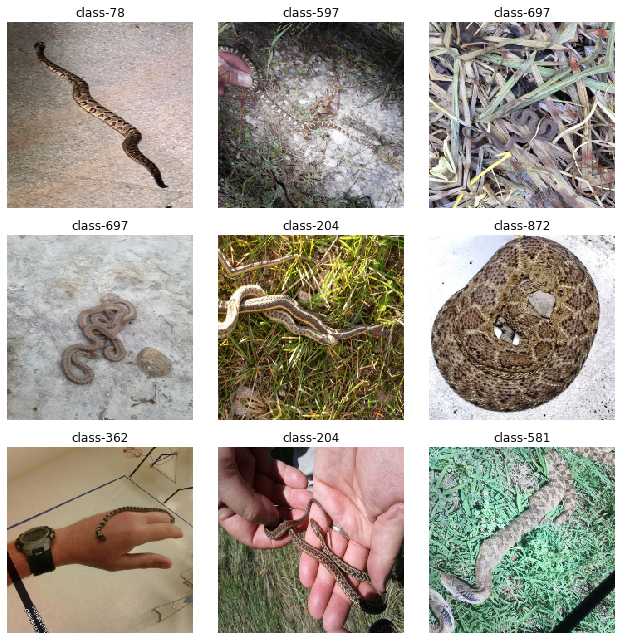

In [14]:
data.show_batch(3,figsize=(9,9))

In [29]:
list(children(model))[-2:]

[Linear(in_features=512, out_features=1000, bias=True),
 Linear(in_features=512, out_features=45, bias=True)]

In [16]:
model.add_module('_fc',nn.Linear(1000, data.c))

In [17]:
loss_func = LabelSmoothingCrossEntropy()

In [18]:
RMSprop = partial(torch.optim.RMSprop)

In [19]:
from torch.optim import Optimizer

In [20]:
kappa = KappaScore()
kappa.weights = "quadratic"

In [21]:
learn = Learner(data, model, loss_func=loss_func, opt_func=RMSprop, metrics=[accuracy,FBeta(beta=1,average='micro'),kappa, Precision(average='micro'),Recall(average='micro')])

In [28]:
lr=1e-3

In [26]:
learn.fit_one_cycle(40,max_lr=slice(lr/100,lr), callbacks=[callbacks.SaveModelCallback(learn, every='improvement', monitor='accuracy', name='best_resnet_40')])

ZeroDivisionError: division by zero

In [24]:
save_name = model_name+"_trained_for_40"
learn.save(save_name, return_path=True)

PosixPath('../../data/train/models/efficientnet-b2_trained_for_40.pth')

In [25]:
name = model_name+"_best_20"
learn.fit_one_cycle(20,max_lr=slice(lr/1000,lr/100), callbacks=[callbacks.SaveModelCallback(learn, every='improvement', monitor='accuracy', name=name)])

epoch,train_loss,valid_loss,accuracy,f_beta,kappa_score,precision,recall,time
0,0.754612,1.483272,0.767882,0.767882,0.736851,0.767882,0.767882,19:56
1,0.758258,1.482917,0.769156,0.769156,0.740185,0.769156,0.769156,19:57
2,0.757911,1.481370,0.770066,0.770066,0.741232,0.770066,0.770066,19:55
3,0.755034,1.485453,0.768003,0.768003,0.737788,0.768003,0.768003,20:14
4,0.741814,1.484749,0.769581,0.769581,0.740085,0.769581,0.769581,20:05
5,0.747606,1.484226,0.769581,0.769581,0.739870,0.769581,0.769581,20:02
6,0.744307,1.485235,0.770127,0.770127,0.741401,0.770127,0.770127,20:01
7,0.749475,1.486162,0.769884,0.769884,0.737731,0.769884,0.769884,20:03
8,0.744952,1.484011,0.770369,0.770369,0.742197,0.770369,0.770369,45:53
9,0.744286,1.488556,0.770127,0.770127,0.741435,0.770127,0.770127,40:49


Better model found at epoch 0 with accuracy value: 0.7678820490837097.
Better model found at epoch 1 with accuracy value: 0.7691560983657837.
Better model found at epoch 2 with accuracy value: 0.7700661420822144.
Better model found at epoch 6 with accuracy value: 0.7701268196105957.
Better model found at epoch 8 with accuracy value: 0.7703694701194763.
Better model found at epoch 13 with accuracy value: 0.7715221643447876.


In [26]:
save_name = model_name+"_trained_another_20"
learn.save(save_name, return_path=True)

PosixPath('../../data/train/models/efficientnet-b2_trained_another_20.pth')